- 영화의 장르별 분포 및 장르별 평균 평점을 확인한다.

### 수행 방법
- 결측치를 파악후 제거 또는 채운다.
- 장르별 분포 수 및 평균 평점을 파악한다.
- 이를 히스토그램 및 Bar Chart로 표현한다.

In [3]:
# module
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Util Functions

def get_df_from(path: str, sep: str = ','):
    extension = path.split('.')[-1]
    try:
        if extension == "csv" or extension == "txt":
            df = pd.read_csv(path, sep=sep, on_bad_lines='skip')
            if df.empty:
                print("W: DataFrame is empty.")
                return None
            return df
        else:
            print("E: File extension is not supported.")
            return None
    except FileNotFoundError:
        print(f"E: File not found. Check the path: {path}")
        return None
    except pd.errors.ParserError as e:
        print(f"E: Error parsing CSV file: {e}")
    except Exception as e:
        print(f"E: An unexpected error occured: {e}")

def calculate_mean(lst):
    if lst: # 빈 리스트가 아닌 경우에만 평균 계산
        return np.mean(lst)
    return 0 # 빈 리스트인 경우 NaN 반환

def calculate_sum(lst):
    if lst:
        return np.sum(lst)
    return 0

def get_barchart_from(df: pd.DataFrame, x_col: str, y_col: str):
    plt.figure(figsize=(10, 6))
    plt.bar(df[x_col], df[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(df[x_col], rotation=45, ha='right')
    plt.show()


In [5]:
# Function

In [6]:
file_path = '../public/kmrd-small/genres.csv'
df = get_df_from(file_path)

while df is None:
    file_path = input("유효한 파일을 경로까지 입력해주세요: ")
    df = get_df_from(file_path)

df = df.dropna()

genre_movies = df.groupby('genre')['movie']
genre_movies = genre_movies.apply(list).reset_index()
print(f"--- genre movies ---\n")

genre_counts = df['genre'].value_counts().reset_index()

genre_counts.columns = ['genre', 'count']

genre_df = pd.merge(genre_counts, genre_movies, on='genre', how='left')

print(genre_df)


--- genre movies ---

     genre  count                                              movie
0      드라마    529  [10001, 10014, 10015, 10017, 10019, 10020, 100...
1      코미디    233  [10002, 10003, 10004, 10010, 10016, 10027, 100...
2       액션    211  [10005, 10006, 10007, 10008, 10009, 10010, 100...
3   멜로/로맨스    172  [10001, 10013, 10020, 10058, 10059, 10067, 100...
4      스릴러    162  [10012, 10013, 10015, 10026, 10028, 10029, 100...
5       모험    117  [10005, 10006, 10007, 10008, 10009, 10010, 100...
6       범죄    117  [10012, 10016, 10019, 10026, 10027, 10046, 100...
7       SF     80  [10002, 10003, 10004, 10005, 10006, 10007, 100...
8       공포     79  [10013, 10029, 10030, 10031, 10032, 10037, 100...
9       전쟁     75  [10014, 10020, 10039, 10042, 10043, 10044, 100...
10     판타지     55  [10004, 10005, 10006, 10007, 10009, 10010, 100...
11    미스터리     48  [10050, 10066, 10074, 10122, 10135, 10221, 102...
12     뮤지컬     41  [10087, 10089, 10098, 10102, 10105, 10108, 101...
13      가족  

In [7]:
genre_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genre   20 non-null     object
 1   count   20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 452.0+ bytes


In [8]:
file_path = '../public/kmrd-small/rates.csv'

rates_df = get_df_from(file_path)
while rates_df is None:
    file_path = input("유효한 파일을 경로까지 입력해주세요: ")
    file_path = '../public/kmrd-small/rates.csv'
    rates_df = get_df_from(file_path)

rates_grouped = rates_df.groupby('movie')


In [9]:
for key, group in rates_grouped:
    print("* key", key)
    print("* cnt", len(group))
    print(group.head(), end="\n\n")

* key 10001
* cnt 3635
     user  movie  rate        time
86      2  10001    10  1323502620
275     8  10001    10  1468992000
288     9  10001    10  1192335840
345    14  10001    10  1328960520
401    19  10001    10  1090170780

* key 10002
* cnt 3004
     user  movie  rate        time
270     7  10002    10  1137907260
276     8  10002    10  1437473520
405    19  10002    10  1191065040
406    19  10002    10  1217002860
407    19  10002    10  1228449600

* key 10003
* cnt 989
      user  movie  rate        time
0        0  10003     7  1494128040
409     19  10003    10  1191374880
1289    44  10003     7  1275748800
1290    44  10003     8  1156389240
1291    44  10003    10  1166333460

* key 10004
* cnt 700
      user  movie  rate        time
1        0  10004     7  1467529800
410     19  10004    10  1191065220
1294    44  10004     7  1190435160
1295    44  10004     8  1164877860
1296    44  10004     9  1295524440

* key 10005
* cnt 905
      user  movie  rate        t

In [10]:
rates_grouped.agg({
    'rate': 'count'
})

,rate
movie,
10001,3635
10002,3004
10003,989
10004,700
10005,905
...,...
10983,56
10985,7
10988,13


In [11]:
movie_rates = rates_grouped['rate'].apply(list).reset_index()

movie_rates['rate_num'] = movie_rates['rate'].apply(len)
movie_rates['rate_sum'] = movie_rates['rate'].apply(calculate_sum)

genre_df['rate_num'] = genre_df['movie'].apply(lambda list: movie_rates[movie_rates['movie'].isin(list)]['rate_num'].sum())
genre_df['rate_sum'] = genre_df['movie'].apply(lambda list: movie_rates[movie_rates['movie'].isin(list)]['rate_sum'].sum())

genre_df['rate_avg'] = genre_df['rate_sum'] / genre_df['rate_num']
print(genre_df)

     genre  count                                              movie  \
0      드라마    529  [10001, 10014, 10015, 10017, 10019, 10020, 100...   
1      코미디    233  [10002, 10003, 10004, 10010, 10016, 10027, 100...   
2       액션    211  [10005, 10006, 10007, 10008, 10009, 10010, 100...   
3   멜로/로맨스    172  [10001, 10013, 10020, 10058, 10059, 10067, 100...   
4      스릴러    162  [10012, 10013, 10015, 10026, 10028, 10029, 100...   
5       모험    117  [10005, 10006, 10007, 10008, 10009, 10010, 100...   
6       범죄    117  [10012, 10016, 10019, 10026, 10027, 10046, 100...   
7       SF     80  [10002, 10003, 10004, 10005, 10006, 10007, 100...   
8       공포     79  [10013, 10029, 10030, 10031, 10032, 10037, 100...   
9       전쟁     75  [10014, 10020, 10039, 10042, 10043, 10044, 100...   
10     판타지     55  [10004, 10005, 10006, 10007, 10009, 10010, 100...   
11    미스터리     48  [10050, 10066, 10074, 10122, 10135, 10221, 102...   
12     뮤지컬     41  [10087, 10089, 10098, 10102, 10105, 10108, 10

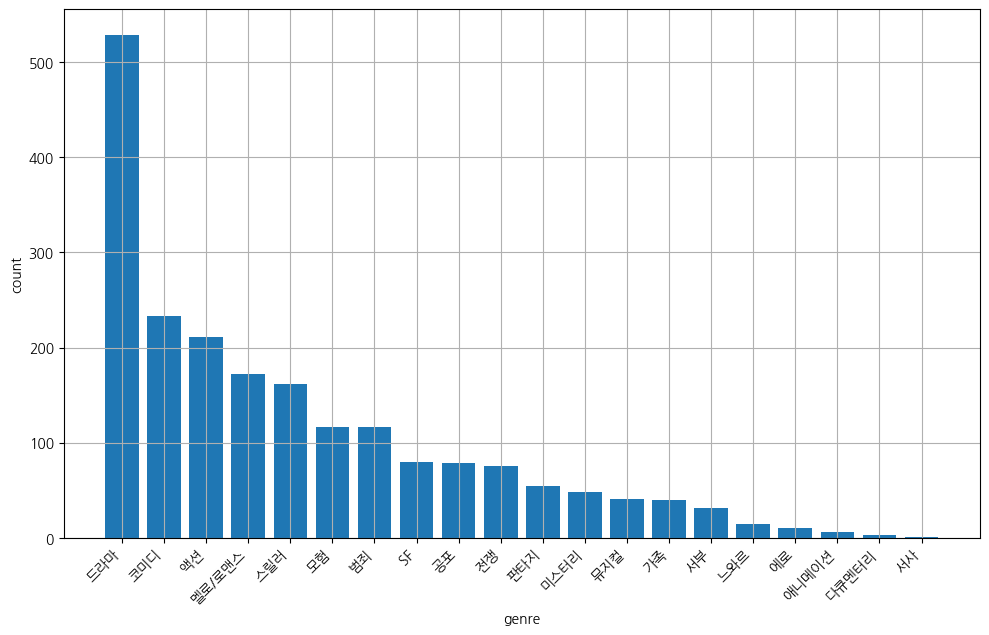

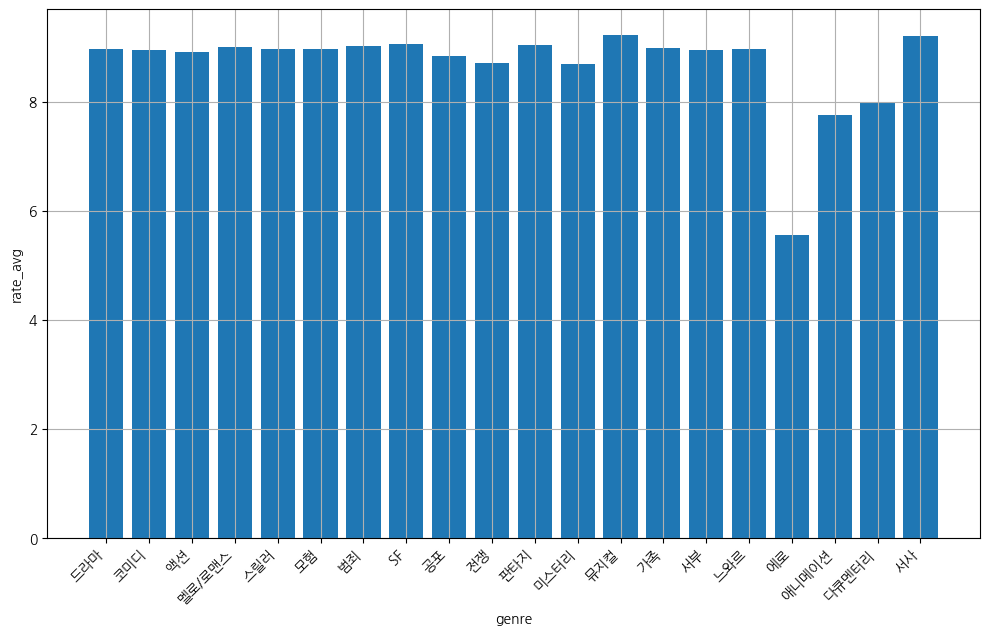

In [12]:
get_barchart_from(genre_df, "genre", "count")
get_barchart_from(genre_df, "genre", "rate_avg")